In [15]:
# Defining plot decision regions function for visualization
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import numpy as np
def plot_decision_regions(X,y,classifier,test_idx=None, resolution=0.02):
    # setup marker generators and colormap
    markers=('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx1.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label = f'Class {cl}',
                    edgecolors='black') 


In [16]:
# Preprocessing the datasets
import pandas as pd
wine_df = pd.read_csv("Wine_dataset.csv")
wine_df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [17]:
X, y = wine_df.iloc[:,1:], wine_df.iloc[:,0]
X.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [18]:
print(y.head())
y.value_counts()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64


1
2    71
1    58
3    48
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


In [20]:
# PCA using scikit-learn PCA class
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# initializing the PCA transformer and LogisticRegression estimator
pca = PCA(n_components=2)
logr = LogisticRegression(multi_class='ovr', random_state=42, solver='lbfgs')

# Dimensionality Regression
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)


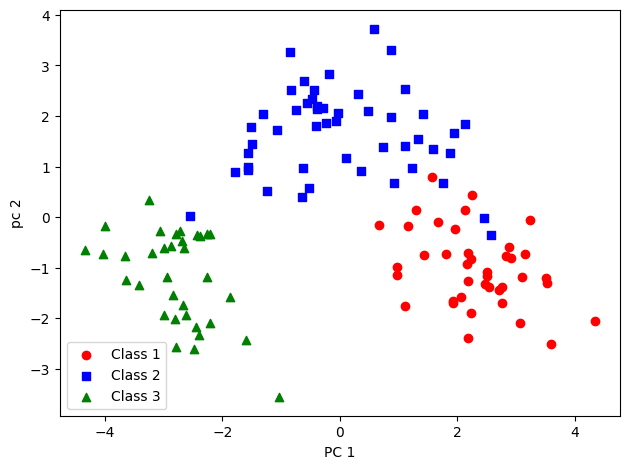

In [21]:
# Visualizing the transformed Wine dataset into 2d scatterplot
colors = ['r','b', 'g']
markers =['o','s','^']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l,1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('pc 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

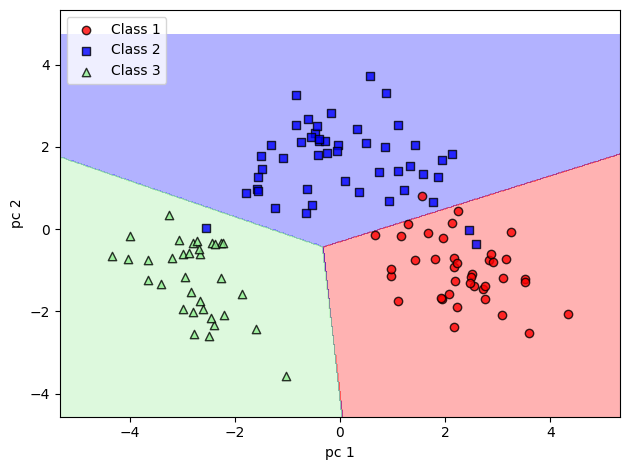

In [22]:
# Fitting the logistic regression model on the reduced dataset
logr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca,y_train, logr)
plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [23]:
pca.explained_variance_ratio_

array([0.34924134, 0.19921864])

In [24]:
pca.components_

array([[ 0.09930827, -0.20926976,  0.03405358, -0.25887308,  0.1652775 ,
         0.41621405,  0.42605217, -0.34236639,  0.30990027, -0.09893638,
         0.23748507,  0.38874953,  0.25599061],
       [ 0.46108578,  0.25375336,  0.20481529, -0.07557815,  0.34784899,
         0.0569326 , -0.04957679,  0.01713264,  0.02103518,  0.53313512,
        -0.28361687, -0.15854077,  0.39762661]])

In [25]:
pca.explained_variance_

array([4.62580035, 2.63870721])

In [26]:
pca.get_covariance()

array([[ 1.02936228,  0.16028441,  0.21165125, -0.17795002,  0.4030145 ,
         0.22372266,  0.1248255 , -0.12224072,  0.14594857,  0.47488774,
        -0.17769373,  0.00444708,  0.48787223],
       [ 0.16028441,  0.85737606,  0.07979198,  0.18096623,  0.04373142,
        -0.32528836, -0.39031447,  0.30157742, -0.25355243,  0.36793902,
        -0.35364822, -0.41637508, -0.00729859],
       [ 0.21165125,  0.07979198,  0.63632445, -0.0684156 ,  0.17223307,
         0.08228697,  0.03795265, -0.0402409 ,  0.05210515,  0.2150088 ,
        -0.08868385, -0.01398793,  0.20620208],
       [-0.17795002,  0.18096623, -0.0684156 ,  0.82923622, -0.22973313,
        -0.44884624, -0.44237831,  0.35908094, -0.33081592,  0.02013582,
        -0.20605412, -0.38570602, -0.33347528],
       [ 0.4030145 ,  0.04373142,  0.17223307, -0.22973313,  0.90870876,
         0.32229983,  0.25131934, -0.21850184,  0.22441221,  0.32176867,
        -0.04645802,  0.14674524,  0.4624792 ],
       [ 0.22372266, -0.325288

In [27]:
pca.score(X_train_std)

-16.210195033982895

## Assesing feature contributions
loadings = eigen_vecs * np.sqrt(eigen_vals)

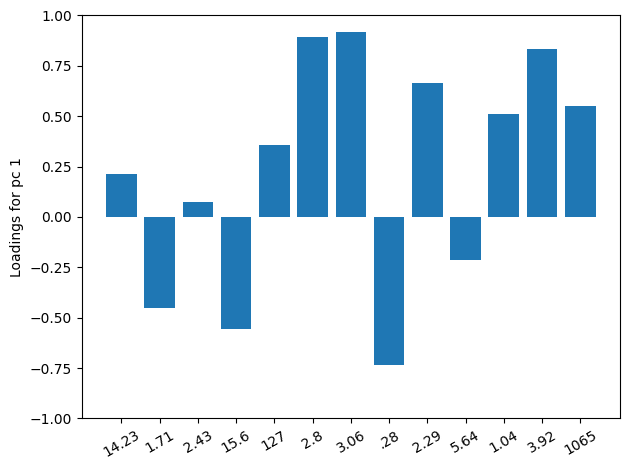

In [32]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) # pca_components is eigen_vecs and pca.explained_varience is eigen_vals
fig, ax = plt.subplots()
ax.bar(range(13),loadings[:,0], align='center')
ax.set_ylabel('Loadings for pc 1')
ax.set_xticks(range(13))
ax.set_xticklabels(wine_df.columns[1:], rotation=30)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

## PCA on IRIS dataset
#### Steps Involved in PCA:
1. Standardize the Data: If the variables have different units or scales, it is crucial to standardize them.
2. Compute the Covariance Matrix: This matrix describes the variance and covariance of the variables.
3. Compute the Eigenvalues and Eigenvectors: These represent the magnitude and direction of the principal components, respectively.
4. Sort the Eigenvalues and Eigenvectors: Sort them in descending order of the eigenvalues.
5. Select the Top k Principal Components: Choose the top k eigenvectors corresponding to the largest k eigenvalues.
6. Transform the Data: Project the original data onto the k principal components.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

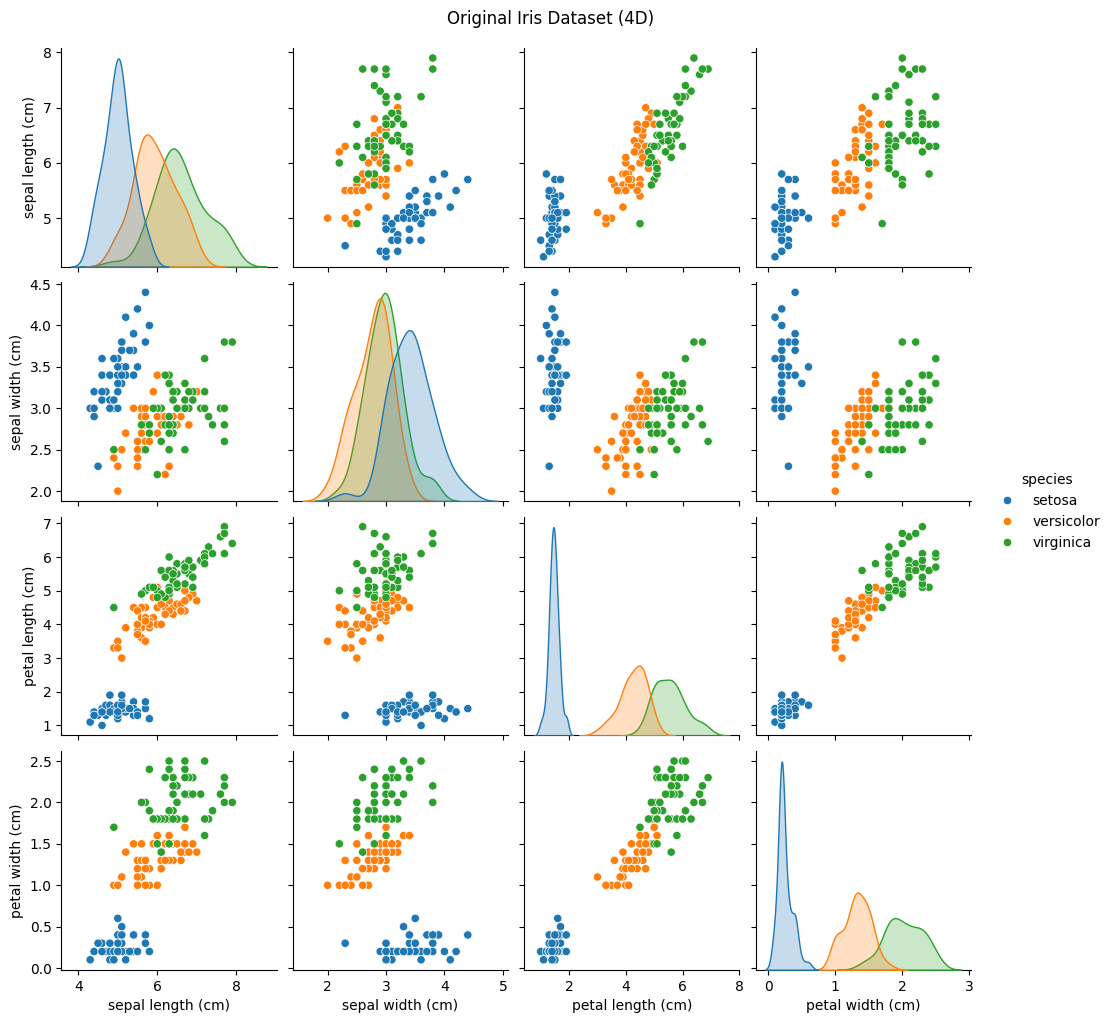

In [4]:
# Plotting original iris dataset
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Plot the original dataset using pair plots
sns.pairplot(df, hue='species')
plt.suptitle('Original Iris Dataset (4D)', y=1.02)
plt.show()

In [35]:
# Standarize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Perform PCA
pca = PCA(n_components=2) # Reduce to the 2 Dimensions
x_pca = pca.fit_transform(X_scaled)


In [41]:
x_pca.shape

(150, 2)

In [45]:
# Explained Varience ratio
explained_varience_ratio = pca.explained_variance_ratio_
print(f"{explained_varience_ratio = } ")

explained_varience_ratio = array([0.72962445, 0.22850762]) 


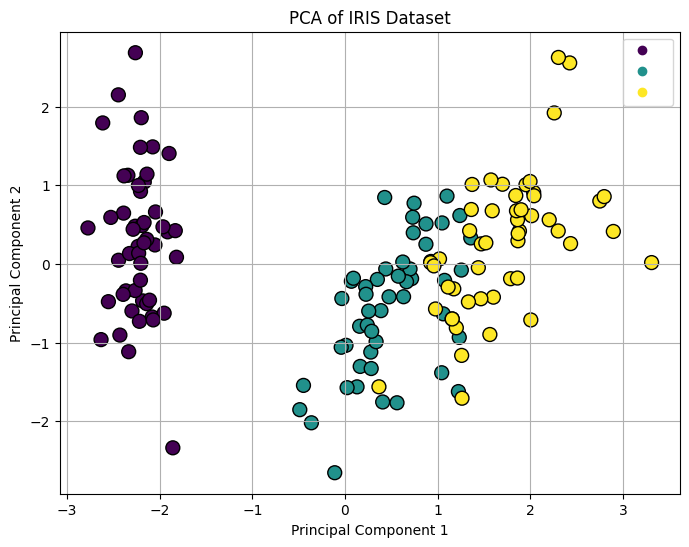

In [52]:
# Plotting the transformed data
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis', edgecolors='k', s = 100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend(handles=scatter.legend_elements()[0])
plt.grid(True)
plt.show()

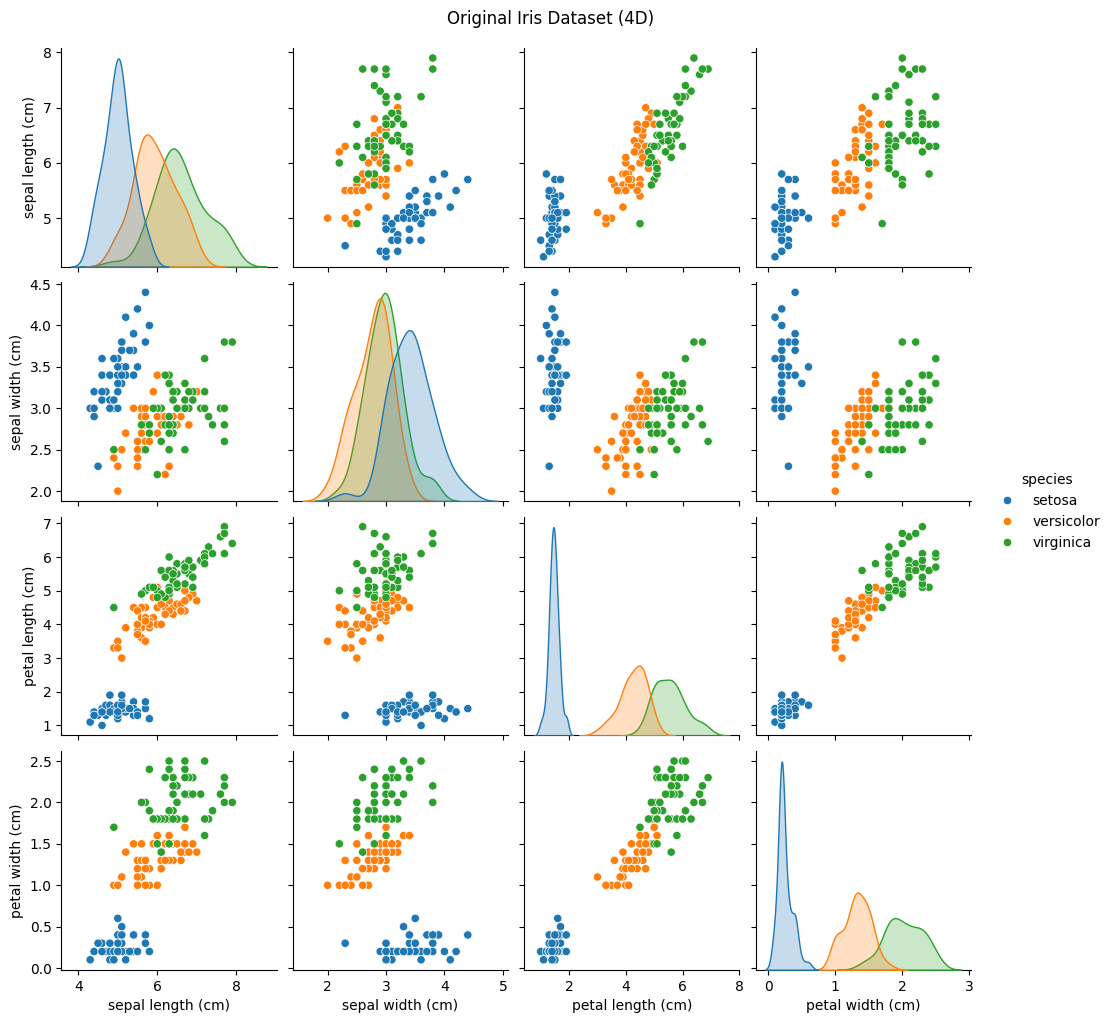

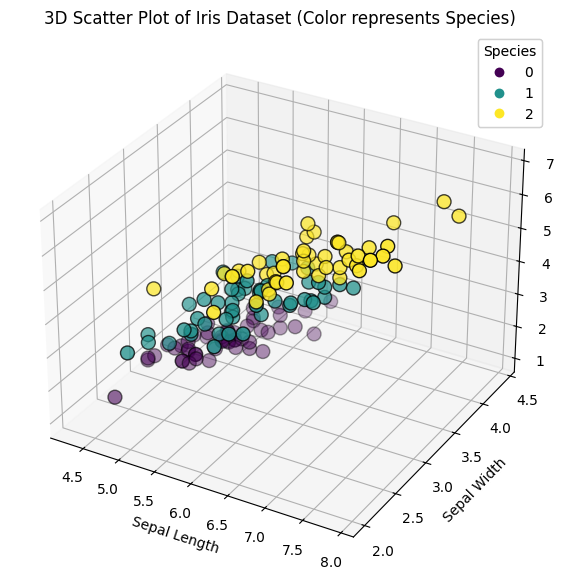

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Plot the original dataset using pair plots
sns.pairplot(df, hue='species')
plt.suptitle('Original Iris Dataset (4D)', y=1.02)
plt.show()

# 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the colors
colors = ['r', 'g', 'b']
species = df['species'].cat.codes

# Plot the points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=species, cmap='viridis', edgecolor='k', s=100)
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)

# Labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Dataset (Color represents Species)')
plt.show()